In [3]:
import pandas as pd
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import time
import numpy as np
import json
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [4]:
vaccines={}
with open('../components/gis/data/provincial-vaccination-data-dashboard.json', encoding='utf-8') as json_file:
    jsondata=json.load(json_file)
    jsondata=jsondata['data']
    for province in jsondata:
        vaccines[province['name']]=round(province['coverage']*100,2)
print(vaccines)

{'กรุงเทพมหานคร': 6.86, 'สมุทรปราการ': 2.93, 'นนทบุรี': 4.96, 'ปทุมธานี': 2.09, 'พระนครศรีอยุธยา': 0.9, 'อ่างทอง': 2.11, 'ลพบุรี': 0.94, 'สิงห์บุรี': 2.03, 'ชัยนาท': 1.13, 'สระบุรี': 1.69, 'ชลบุรี': 4.51, 'ระยอง': 2.15, 'จันทบุรี': 1.4, 'ตราด': 1.8, 'ฉะเชิงเทรา': 0.93, 'ปราจีนบุรี': 1.33, 'นครนายก': 2.55, 'สระแก้ว': 1.76, 'ราชบุรี': 0.9, 'กาญจนบุรี': 0.72, 'สุพรรณบุรี': 1.1, 'นครปฐม': 1.12, 'สมุทรสาคร': 17.23, 'สมุทรสงคราม': 3.2, 'เพชรบุรี': 2.36, 'ประจวบคีรีขันธ์': 2.72, 'เชียงใหม่': 1.84, 'ลำพูน': 1.02, 'ลำปาง': 1.24, 'อุตรดิตถ์': 1.26, 'แพร่': 1.08, 'น่าน': 0.89, 'พะเยา': 1.19, 'เชียงราย': 0.91, 'แม่ฮ่องสอน': 1.48, 'นครสวรรค์': 0.86, 'อุทัยธานี': 0.99, 'กำแพงเพชร': 0.84, 'ตาก': 6.47, 'สุโขทัย': 0.82, 'พิษณุโลก': 1.19, 'พิจิตร': 1.06, 'เพชรบูรณ์': 1.01, 'นครราชสีมา': 1.39, 'บุรีรัมย์': 3.5, 'สุรินทร์': 0.79, 'ศรีสะเกษ': 0.63, 'อุบลราชธานี': 0.81, 'ยโสธร': 0.91, 'ชัยภูมิ': 1.02, 'อำนาจเจริญ': 1.05, 'บึงกาฬ': 1.18, 'หนองบัวลำภู': 0.73, 'ขอนแก่น': 1.05, 'อุดรธานี': 1.3, 'เลย': 1.08, 'หน

[8, 8, 11, 6, 16, 6, 4, 11, 12, 18, 11, 24, 19, 29, 21, 25, 31, 26, 20, 23, 34, 20, 39, 51, 46, 36, 25, 46, 39, 28, 21, 36, 22, 16, 24, 21, 18, 23, 22, 14, 25, 26, 34, 12, 14, 23, 13, 8, 13, 36, 11, 7, 19, 26, 25, 8, 15, 12, 23, 15, 14, 20, 9, 3, 8, 7, 15, 15, 8, 6, 4, 10, 11, 9, 9, 4, 8, 3, 4, 7, 12, 14, 4, 6, 12, 5, 14, 9, 21, 97, 25, 104, 172, 32, 22, 41, 24, 23, 364, 47, 69, 100, 52, 40, 17, 25, 19, 11, 24, 41, 41, 55, 157, 221, 104, 272, 188, 236, 142, 195, 358, 413, 314, 279, 349, 295, 351, 368, 446, 741, 1585, 1079, 908, 994, 834, 693, 420, 743, 544, 675, 566, 791, 740, 869, 1116, 983, 569, 862, 980, 3905]
0.044493913650512695 กรุงเทพมหานคร
[0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 13, 18, 15, 5, 0, 1, 2, 0, 2, 1, 2, 3, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 8, 1, 1, 1, 10, 2, 0, 6, 1, 0, 1, 3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 13, 5, 1, 1, 2, 1, 11, 1, 3, 0, 1, 0, 0, 2, 0, 0, 0, 5, 3, 0, 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 13, 0, 16, 5, 4, 5, 2, 1, 3, 3, 6, 3, 12, 2, 3, 6, 6, 15, 11, 14, 15, 10, 6, 5, 14, 16, 4, 9, 23, 6, 8, 1]
0.014720916748046875 กาญจนบุรี
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 8, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 6, 3, 0, 6, 9, 6, 8, 9, 9, 8, 5, 3, 6, 10, 4, 4, 5, 11, 5, 8, 3, 0, 7, 5, 0, 5, 6, 5, 7, 4, 3]
0.014480829238891602 ลพบุรี
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 5, 1, 10, 17, 5, 2, 1, 4, 0, 0, 1, 0, 0, 0, 2, 7, 0, 0, 0, 1, 1, 4, 3, 2, 1, 0, 0, 0]
0.014815092086791992 อุตรดิตถ์
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 5, 3, 1, 1, 1, 3, 7, 1, 6, 3, 3, 2, 3, 2, 0, 1, 5, 5, 5, 6, 3, 2, 0, 0, 0, 2, 3, 1, 1, 0, 0, 1, 4, 5]
0.014500856399536133 ชุมพร
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 1, 0, 2

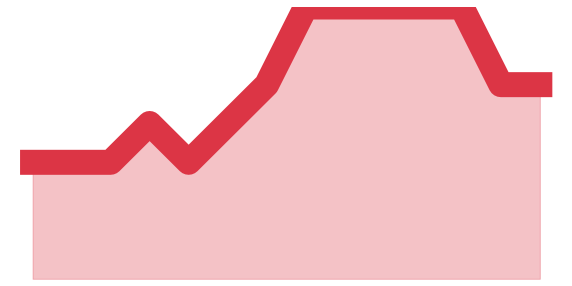

In [4]:
data=pd.read_csv('dataset.csv')
pdata=[]
with open('../components/gis/geo/th-provinces-centroids.json', encoding='utf-8') as json_file:
    jsondata = json.load(json_file)
    for province in jsondata['features']:
        pdata.append(province['properties']['PROV_NAMT'])        

lastRow=data.tail(1)
date=list(lastRow['announce_date'])[0].strip()
end=datetime.datetime.strptime(date,'%d/%m/%y')
start = datetime.datetime.strptime("2020-12-15", "%Y-%m-%d")

date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
fulldate=[]
for date in date_generated:
    fulldate.append(date)    

provinces={}
for row in data.iterrows():
    row = dict(row[1])
    province = row['province_of_isolation']
    date = row['announce_date']
    if province in provinces:    
        if(isinstance(date, str)):
            parsedDate=datetime.datetime.strptime(date.strip(),'%d/%m/%y')                            
            if(parsedDate>=start):
                provinces[province].append(parsedDate)            
    else:
        provinces[province]=[]
        
def movingAve(ys):
    N = 7
    cumsum, moving_aves = [0], []

    for i, x in enumerate(ys, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return(moving_aves)
images=[]
i=1
for name in provinces.keys():
    if(name in pdata):
        start=time.time()
        province=dict(Counter(provinces[name]))
        names=list(province.keys())
        values=list(province.values())
        for day in fulldate:
            if(day not in names):
                province[day]=0
        names=sorted(province)
        ys=[]
        for day in names:
            ys.append(province[day])
        moving_aves=movingAve(ys)
        fig = plt.gcf()        
        plt.cla()
        fig.set_size_inches(10,5)
        if(max(moving_aves[-14:])==0):
            plt.ylim(0,1)
        else:
            plt.ylim(0,max(moving_aves[-14:]))
        plt.fill_between(names[-14:],0,moving_aves[-14:], alpha=0.3, color='#dc3545', zorder=2)
        #plt.fill_between(names[6:len(names)-13],0,moving_aves[:len(moving_aves)-13], alpha=0.3, color='#fa9ba4', zorder=2)
        #plt.plot(names[6:],moving_aves, color='#fa9ba4',linewidth=2)
        #plt.bar(names, ys, width=0.9,color='#fa9ba4', alpha=0.2)
        plt.plot(names[-14:],moving_aves[-14:], color='#dc3545',linewidth=25)         
        plt.box(False)
        #plt.tick_params(axis='y',length=16, width=2,direction='in',color='#e0e0e0',pad=10)        
        #plt.tick_params(axis='x',length=0, pad=10)
        #plt.xticks([min(names), max(names)],fontsize=24, color='#e0e0e0')        
        #plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))
        print(ys)
        plt.xticks([])
        plt.yticks([])
        #plt.savefig('../public/infection-graphs-build/'+str(pdata.index(name)+1)+'.svg',bbox_inches=0, transparent=True)        
        #plt.show()
        print(time.time()-start, name)
        change = int((moving_aves[-1]-moving_aves[-14])*100/(moving_aves[-14]))
        images.append({
            "name": str(pdata.index(name)+1)+".svg",
            "change": change,
            "total-14days": sum(ys[-14:]),
            "province": name,
            "vax-coverage": vaccines[name]
            
        })
        i+=1

with open('../components/build_job.json', 'w', encoding='utf-8') as f:
    data={'images': images, 'job': {
        'ran_on': datetime.date.today().strftime("%m/%d/%Y %H:%M"),
        'dataset_updated_on': end.strftime("%m/%d/%Y %H:%M")
    }}
    json.dump(data, f)
    f.close()
print('done')


In [77]:
x=[8.428571428571429, 8.857142857142858, 9.428571428571429, 10.428571428571429, 11.142857142857142, 12.285714285714286, 14.142857142857142, 17.714285714285715, 19.142857142857142, 21.0, 22.857142857142858, 25.0, 24.428571428571427, 25.0, 25.714285714285715, 25.571428571428573, 27.571428571428573, 30.428571428571427, 33.285714285714285, 35.57142857142857, 35.857142857142854, 37.57142857142857, 40.285714285714285, 38.714285714285715, 34.42857142857143, 33.0, 31.0, 29.714285714285715, 26.571428571428573, 24.0, 22.571428571428573, 22.857142857142858, 20.857142857142858, 19.714285714285715, 21.0, 21.285714285714285, 23.142857142857142, 22.285714285714285, 21.0, 21.142857142857142, 21.0, 18.571428571428573, 16.714285714285715, 17.0, 16.857142857142858, 15.857142857142858, 15.285714285714286, 17.142857142857142, 19.571428571428573, 18.857142857142858, 15.857142857142858, 16.0, 18.285714285714285, 17.714285714285715, 16.0, 15.285714285714286, 15.428571428571429, 13.714285714285714, 13.142857142857142, 10.857142857142858, 10.857142857142858, 11.0, 9.285714285714286, 8.857142857142858, 9.0, 9.285714285714286, 9.857142857142858, 9.0, 8.142857142857142, 7.571428571428571, 7.857142857142857, 7.714285714285714, 6.857142857142857, 6.285714285714286, 6.714285714285714, 7.428571428571429, 7.428571428571429, 7.142857142857143, 8.428571428571429, 8.571428571428571, 9.571428571428571, 9.142857142857142, 10.142857142857142, 23.428571428571427, 26.142857142857142, 39.285714285714285, 63.142857142857146, 65.71428571428571, 67.57142857142857, 70.42857142857143, 60.0, 59.714285714285715, 96.85714285714286, 79.0, 84.28571428571429, 95.42857142857143, 97.0, 99.28571428571429, 98.42857142857143, 50.0, 46.0, 37.714285714285715, 26.857142857142858, 25.285714285714285, 25.428571428571427, 30.857142857142858, 49.714285714285715, 78.57142857142857, 91.85714285714286, 127.28571428571429, 148.28571428571428, 176.14285714285714, 188.57142857142858, 194.0, 213.57142857142858, 257.7142857142857, 263.7142857142857, 276.7142857142857, 292.85714285714283, 314.7142857142857, 337.0, 338.42857142857144, 343.14285714285717, 404.14285714285717, 590.7142857142857, 695.0, 782.5714285714286, 874.4285714285714, 941.0, 976.2857142857143, 930.4285714285714, 810.1428571428571, 733.7142857142857, 700.4285714285714, 639.2857142857143, 633.1428571428571, 639.8571428571429, 704.0, 757.2857142857143, 820.0, 804.8571428571429, 847.1428571428571, 874.1428571428571, 1326.2857142857142, 1202.142857142857, 1042.7142857142858]

1042.7142857142858